
# Gradient Descent - Step-by-Step

This notebook provides a detailed explanation of **Gradient Descent**, a powerful optimization algorithm widely used in statistics, machine learning, and data science. We will go through its concepts, mathematical formulations, and practical applications, enhancing the material presented in [StatQuest's video](https://www.youtube.com/watch/sDv4f4s2SB8).



## What is Gradient Descent?

Gradient Descent is an iterative optimization algorithm used to minimize a loss function, $L(\theta)$, where $\theta$ represents the parameters of a model. It works by taking steps proportional to the negative gradient of the loss function:

$$ \theta_{new} = \theta_{old} - \alpha \frac{\partial L}{\partial \theta} $$

- $\alpha$: Learning rate, which controls the step size.
- $\frac{\partial L}{\partial \theta}$: Gradient of the loss function with respect to $\theta$.



## How Gradient Descent Works

### Step 1: Define the Loss Function
The loss function evaluates the difference between the predicted values and the actual values. For example, in linear regression, the **Sum of Squared Residuals (SSR)** is often used:

$$ L(\theta) = \sum_{i=1}^n (y_i - (m x_i + b))^2 $$

Where:
- $y_i$: Observed values
- $x_i$: Input features
- $m$ and $b$: Slope and intercept

### Step 2: Compute the Gradient
The gradient represents the direction and rate of change of the loss function. For example:

$$ \frac{\partial L}{\partial b} = -2 \sum_{i=1}^n (y_i - (m x_i + b)) $$

$$ \frac{\partial L}{\partial m} = -2 \sum_{i=1}^n x_i (y_i - (m x_i + b)) $$

### Step 3: Update the Parameters
Update the parameters using the gradient and a predefined learning rate, $\alpha$:

$$ b_{new} = b_{old} - \alpha \frac{\partial L}{\partial b} $$

$$ m_{new} = m_{old} - \alpha \frac{\partial L}{\partial m} $$

### Step 4: Iterate Until Convergence
Repeat steps 2 and 3 until the parameters stabilize or the maximum number of iterations is reached.


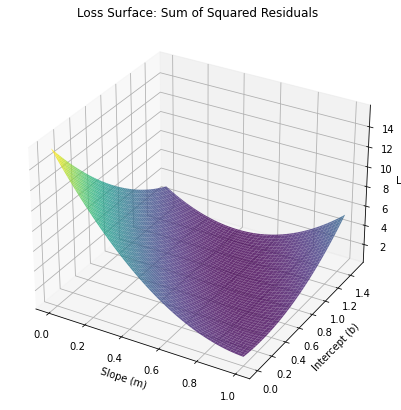

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Example data: Linear regression
x = np.array([0.5, 2.3, 2.9])
y = np.array([1.4, 1.9, 3.2])

# Loss function (Sum of Squared Residuals)
def loss(m, b):
    return np.sum((y - (m * x + b)) ** 2)

# Visualization of the loss function
m_vals = np.linspace(0, 1, 100)
b_vals = np.linspace(0, 1.5, 100)
M, B = np.meshgrid(m_vals, b_vals)
Z = np.array([[loss(m, b) for m in m_vals] for b in b_vals])

# Plot the 3D loss surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis', alpha=0.8)
ax.set_title("Loss Surface: Sum of Squared Residuals")
ax.set_xlabel("Slope (m)")
ax.set_ylabel("Intercept (b)")
ax.set_zlabel("Loss")
plt.show()



## Single Parameter Gradient Descent Example

### Problem Statement
Let's optimize the following simple quadratic loss function:

$$ L(w) = (w - 3)^2 $$

The goal is to find the value of $w$ that minimizes $L(w)$.

### Step-by-Step Optimization

1. **Initialize the Parameter**: Start with a random guess for $w$. Let $w_0 = 0$.
2. **Compute the Gradient**: The derivative of $L(w)$ is:

$$ \frac{\partial L}{\partial w} = 2(w - 3) $$

3. **Update the Parameter**: Use the update rule:

$$ w_{new} = w_{old} - \alpha \frac{\partial L}{\partial w} $$

Where $\alpha$ is the learning rate.

4. **Iterate**: Repeat until $w$ converges.

The following code demonstrates this process step-by-step.


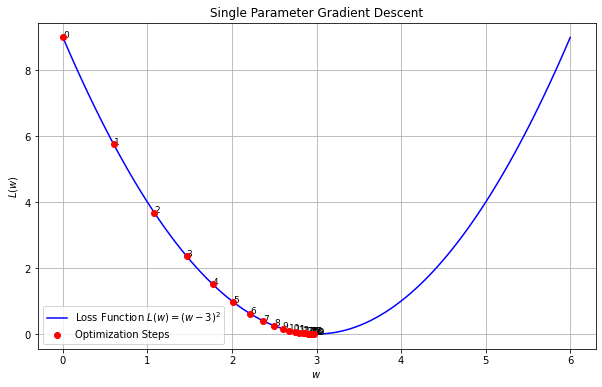

In [2]:

# Define the loss function and its gradient
def loss(w):
    return (w - 3) ** 2

def gradient(w):
    return 2 * (w - 3)

# Gradient descent parameters
learning_rate = 0.1
max_iterations = 20
tolerance = 1e-6

# Initialization
w = 0  # Initial guess
history = [w]  # To store the trajectory of w

# Perform gradient descent
for i in range(max_iterations):
    grad = gradient(w)
    new_w = w - learning_rate * grad
    history.append(new_w)
    if abs(new_w - w) < tolerance:
        break
    w = new_w

# Visualize the optimization
import matplotlib.pyplot as plt
import numpy as np

# Plot the loss function
w_vals = np.linspace(0, 6, 100)
loss_vals = loss(w_vals)

plt.figure(figsize=(10, 6))
plt.plot(w_vals, loss_vals, label="Loss Function $L(w) = (w - 3)^2$", color='blue')
plt.scatter(history, [loss(w) for w in history], color='red', label="Optimization Steps", zorder=5)
for i, (x, y) in enumerate(zip(history, [loss(w) for w in history])):
    plt.text(x, y, f"{i}", fontsize=9)
plt.title("Single Parameter Gradient Descent")
plt.xlabel("$w$")
plt.ylabel("$L(w)$")
plt.legend()
plt.grid()
plt.show()



### Step-by-Step Values

The following table shows the value of $w$, the gradient, and the loss $L(w)$ at each step:

| Step | $w$        | Gradient $\frac{\partial L}{\partial w}$ | $L(w)$      |
|------|------------|-------------------------------------------|-------------|
|   Step |       w |   Gradient |       Loss |
|-------:|--------:|-----------:|-----------:|
|      0 | 0       | -6         | 9          |
|      1 | 0.6     | -4.8       | 5.76       |
|      2 | 1.08    | -3.84      | 3.6864     |
|      3 | 1.464   | -3.072     | 2.3593     |
|      4 | 1.7712  | -2.4576    | 1.50995    |
|      5 | 2.01696 | -1.96608   | 0.966368   |
|      6 | 2.21357 | -1.57286   | 0.618475   |
|      7 | 2.37085 | -1.25829   | 0.395824   |
|      8 | 2.49668 | -1.00663   | 0.253327   |
|      9 | 2.59735 | -0.805306  | 0.16213    |
|     10 | 2.67788 | -0.644245  | 0.103763   |
|     11 | 2.7423  | -0.515396  | 0.0664083  |
|     12 | 2.79384 | -0.412317  | 0.0425013  |
|     13 | 2.83507 | -0.329853  | 0.0272008  |
|     14 | 2.86806 | -0.263883  | 0.0174085  |
|     15 | 2.89445 | -0.211106  | 0.0111415  |
|     16 | 2.91556 | -0.168885  | 0.00713053 |
|     17 | 2.93245 | -0.135108  | 0.00456354 |
|     18 | 2.94596 | -0.108086  | 0.00292067 |
|     19 | 2.95677 | -0.0864691 | 0.00186923 |
|     20 | 2.96541 | -0.0691753 | 0.00119631 |


## Exercises

1. Derive the partial derivatives of the loss function $L(\theta) = \sum_{i=1}^n (y_i - (m x_i + b))^2$ with respect to $m$ and $b$.

2. Implement gradient descent to minimize $L(\theta)$ for the dataset $x = [0.5, 2.3, 2.9]$ and $y = [1.4, 1.9, 3.2]$. Use an initial guess $m = 0, b = 0$ and a learning rate of $0.1$.

3. Plot the convergence of the parameters $m$ and $b$ over iterations.
